In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
magvega = np.array([16.6, 15.6, 11.3, 8.0])
dm = np.array([2.699, 3.339, 5.174, 6.620])

In [15]:
fluxvega = 10**(22.5-magvega)
fluxab = fluxvega*10**(-dm/2.5)
magab = 22.5-np.log10(fluxab)

In [16]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'maglims.csv')

In [17]:
df = pd.read_csv(galaxies)

In [18]:
area = np.pi*(2.5)**2
mulim = df.mag+2.5*np.log10(area)
df['mulim'] = mulim

In [19]:
wise = df[df.survey == 'WISE']
unwise = df[df.survey == 'UNWISE']
sdss = df[df.survey == 'SDSS']
des = df[df.survey == 'DES']
ls = df[df.survey == 'LS']
twomass = df[df.survey == '2MASS']
galexa = df[df.survey == 'GALEXAIS']
galexm = df[df.survey == 'GALEXMIS']
galexd = df[df.survey == 'GALEXDIS']

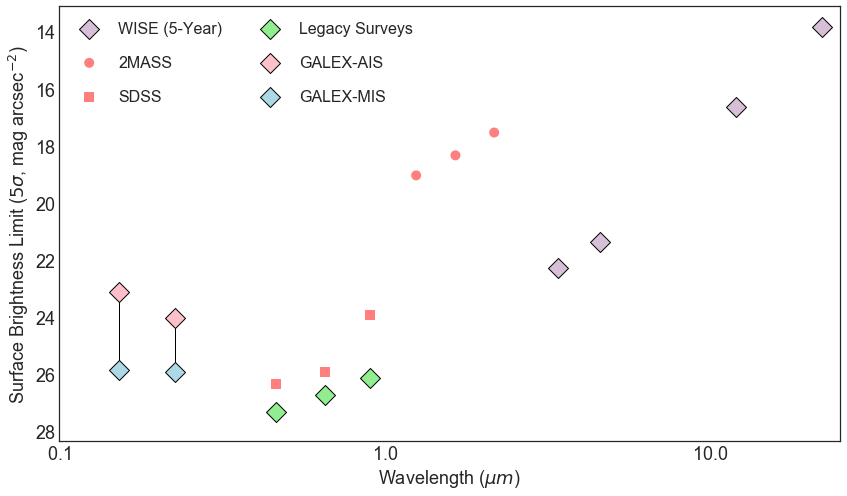

In [20]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter(unwise.wavelength, unwise.mulim, s=200, facecolors='thistle', edgecolors='k', label='WISE (5-Year)', marker='D')
#plt.scatter(unwise.wavelength[2:], unwise.mulim[2:], s=200, facecolors='thistle', edgecolors='k', label='WISE + UNWISE', marker='v')
#plt.scatter(wise.wavelength[:2], wise.mulim[:2], s=200, facecolors='none', edgecolors='green', label='WISE', marker='p')
#plt.scatter(unwise.wavelength[:2], unwise.mulim[:2], s=200, facecolors='cornflowerblue', edgecolors='k', label='UNWISE', marker='o')

ax.scatter(twomass.wavelength, twomass.mulim, s=100, facecolors='red', edgecolors='none', alpha=0.5, label='2MASS', marker='o')

ax.scatter(sdss.wavelength, sdss.mulim, s=100, facecolors='red', edgecolors='none', alpha=0.5,  label='SDSS', marker='s')
#plt.scatter(des.wavelength, des.mulim, s=100, label='DES')
ax.scatter(ls.wavelength, ls.mulim, s=200, facecolors='lightgreen', edgecolors='k', label='Legacy Surveys', marker='D')

ax.scatter(galexa.wavelength, galexa.mulim, s=200, facecolors='pink', edgecolors='k', label='GALEX-AIS', marker='D')
ax.scatter(galexm.wavelength, galexm.mulim, s=200, facecolors='lightblue', edgecolors='k', label='GALEX-MIS', marker='D')
ax.plot([galexa.wavelength.values[0], galexa.wavelength.values[0]], [galexa.mulim.values[0]+0.35, galexm.mulim.values[0]-0.35], color='k', linestyle='-', linewidth=1)
ax.plot([galexa.wavelength.values[1], galexa.wavelength.values[1]], [galexa.mulim.values[1]+0.35, galexm.mulim.values[1]-0.35], color='k', linestyle='-', linewidth=1)


#plt.scatter(galexd.wavelength, galexd.mulim, s=100, label='GALEX DIS', marker='s')
ax.legend(frameon=False, labelspacing=1.2, ncol=2, fontsize=16)
ax.set_xscale('log')
ax.set_xlim([0.1, 25])
ax.invert_yaxis()
ax.set_xlabel(r'Wavelength ($\mu m$)', size=18)
ax.set_ylabel(r'Surface Brightness Limit ($5\sigma$, mag arcsec$^{-2}$)', size=18)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))


In [21]:
omega = np.array([4*np.pi*(180/np.pi)**2, 
                  14000, 
                  4*np.pi*(180/np.pi)**2, 
                  26300,
                  1000,
                  14055,
                  5000]) # 2mass, LS, WISE, GALEXAIS, GALEXMIS SDSS, DES
o2mass, ols, owise, ogalexa, ogalexm, osdss, odes = omega

In [22]:
muwise = df[np.logical_and(df.survey=='UNWISE', df.band=='W1')].mulim.values[0]
mu2mass = df[np.logical_and(df.survey=='2MASS', df.band=='Ks')].mulim.values[0]
muls = df[np.logical_and(df.survey=='LS', df.band=='r')].mulim.values[0]
mugalexa = df[np.logical_and(df.survey=='GALEXAIS', df.band=='NUV')].mulim.values[0]
mugalexm = df[np.logical_and(df.survey=='GALEXMIS', df.band=='NUV')].mulim.values[0]
musdss = df[np.logical_and(df.survey=='SDSS', df.band=='r')].mulim.values[0]
mudes = df[np.logical_and(df.survey=='DES', df.band=='r')].mulim.values[0]

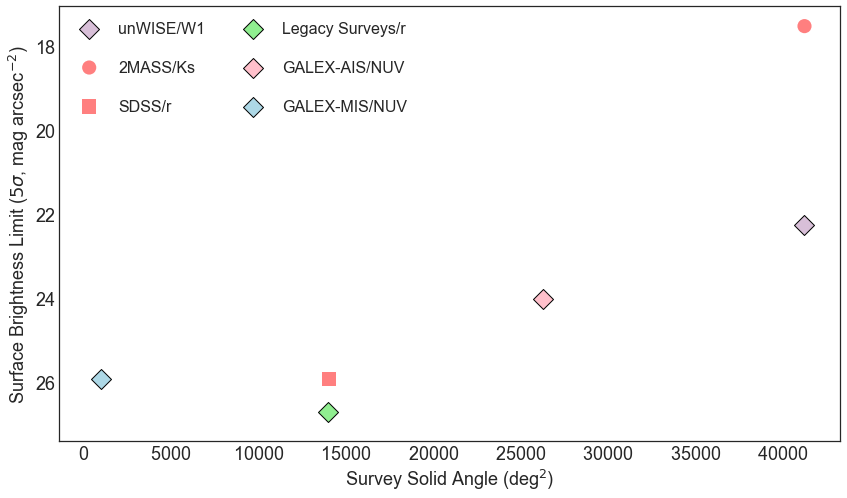

In [23]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(owise, muwise, s=200, label='unWISE/W1', 
            facecolors='thistle', edgecolors='k', marker='D')

plt.scatter(o2mass, mu2mass, color='red', s=200, facecolors='red', 
            edgecolors='none', alpha=0.5, label='2MASS/Ks', marker='o')

plt.scatter(osdss, musdss, color='pink', s=200, facecolors='red', 
            edgecolors='none', alpha=0.5,  label='SDSS/r', marker='s')

plt.scatter(ols, muls, s=200, facecolors='lightgreen', 
            edgecolors='k', label='Legacy Surveys/r', marker='D')

plt.scatter(ogalexa, mugalexa, color='orange', s=200, facecolors='pink', 
            edgecolors='k', label='GALEX-AIS/NUV', marker='D')

plt.scatter(ogalexm, mugalexm, s=200, facecolors='lightblue', 
            edgecolors='k', label='GALEX-MIS/NUV', marker='D')

#plt.scatter(odes, mudes, color='blue', s=200, label='DES')
plt.legend(frameon=False, labelspacing=1.5, ncol=2, fontsize=16)
plt.gca().invert_yaxis()
plt.xlabel(r'Survey Solid Angle (deg$^2$)', size=18)
plt.ylabel(r'Surface Brightness Limit ($5\sigma$, mag arcsec$^{-2}$)', size=18)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))

In [24]:
df[df.survey=='SDSS']

,wavelength,mag,survey,band,Unnamed: 4,mulim
8,0.464,23.1,SDSS,g,NaN,26.332575
9,0.658,22.7,SDSS,r,NaN,25.932575
10,0.900,20.7,SDSS,z,NaN,23.932575


In [14]:
22.2, 22.2, 20.5

(22.2, 22.2, 20.5)